# Librerias

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
%matplotlib inline
from langdetect import detect, DetectorFactory
import re
import nltk
from nltk.corpus import stopwords
from transformers import pipeline
import dash
import dash_bootstrap_components as dbc
from dash import dcc, html
import plotly.express as px
import os
from dash import dcc, html
import dash
import plotly.express as px
import pandas as pd
from selenium import webdriver
import time
from dash import dcc, html, Input, Output

c:\Users\Administrador\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(


# Limpieza

In [65]:
#Carga de datos
data = pd.read_excel(r"C:\Users\Administrador\Desktop\Proyecto Dashboard\Calificaciones Hostal R10 Historico.xlsx", header = 1)

In [66]:
indices_columnas = [0, 1]
nombres_columnas = [data.columns[i] for i in indices_columnas]
nombres_columnas
data = data.drop(columns = nombres_columnas)
data.head(5)

,FECHA,RESERVA #,NOMBRE,PAÍS,TIPO,TIPO HAB,HAB,CALIFICACIÓN,PAC,STAFF,PAC STAFF,LOCATION,PAC LOCATION,COMFORT,PAC COMFORT,CLEANINLESS,PAC CLEANINLESS,FACILITIES,PAC FACILITIES,VALUE FOR MONEY,PAC VALUE,PROMEDIO,COMENTARIOS +,COMENTARIOS -,BED RATING,BREAKFAST,ROOM VIEW,WIFI,COFFEE,Columna1
0,2019-02-22 00:00:00,1112941899,ALEXANDRA,COLOMBIA,VIAJA SOLA,NaN,NaN,10,10.0,10,10.0,10,10,10,10,10,10.0,10,10,10,10.0,10,"Todo estuvo excelente, el lugar es muy lindo y...",Todo me gustó,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-02-22 00:00:00,1592549018,NICOLÁS,COLOMBIA,VIAJA SOLA,NaN,NaN,10,10.0,10,10.0,10,10,10,10,10,10.0,10,10,10,10.0,10,"Muy buena ubicación del hostal, el personal es...",Nada de nada !,10,10,10,10,10,NaN
2,2019-02-22 00:00:00,1770925697,NATALIA,ARGENTINA,VIAJA SOLA,NaN,NaN,10,10.0,10,10.0,10,10,10,10,10,10.0,10,10,10,10.0,10,Es un lugar muy lindo y cómodo. La atención es...,NaN,10,10,10,10,10,NaN
3,2019-02-28 00:00:00,2023906001,SORAYA,GRAN BRETAÑA,PAREJA JOVEN,DBP,204,10,10.0,10,10.0,10,10,10,10,10,10.0,10,10,10,10.0,10,"The place is beautiful, the location perfect a...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-03-01 00:00:00,1287555634,KIM,ALEMANIA,PAREJA JOVEN,DBP,204,10,10.0,10,10.0,10,10,10,10,10,10.0,10,10,10,10.0,10,This hostel is a hidden gem in the middle of B...,The bathroom could’ve been a bit bigger for an...,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
# Diccionario
column_mapping = {
    'FECHA': 'FECHA',
    'RESERVA #': 'ID_RESERVA',
    'NOMBRE': 'NOMBRE_COMPLETO',
    'PAÍS': 'PAIS',
    'TIPO': 'TIPO_VIAJERO',
    'TIPO HAB': 'TIPO_HAB',
    'HAB': 'No_HAB',
    'CALIFICACIÓN': 'CALIFICACION',
    'PAC': 'PAC',
    'STAFF': 'STAFF',
    'PAC STAFF': 'PAC_STAFF',
    'LOCATION': 'LOCATION',
    'PAC LOCATION': 'PAC_LOCATION',
    'COMFORT': 'COMFORT',
    'PAC COMFORT': 'PAC_COMFORT',
    'CLEANINLESS': 'CLEANLINESS',
    'PAC CLEANINLESS': 'PAC_CLEANLINESS',
    'FACILITIES': 'FACILITIES',
    'PAC FACILITIES': 'PAC_FACILITIES',
    'VALUE FOR MONEY': 'VALUE_MONEY',
    'PAC VALUE': 'PAC_VALUE',
    'PROMEDIO': 'PROMEDIO',
    'COMENTARIOS + ': 'COMENTARIO_POSITIVO',
    'COMENTARIOS -': 'COMENTARIO_NEGATIVO',
    'BED RATING': 'BED_RATING',
    'BREAKFAST': 'BREAKFAST',
    'ROOM VIEW': 'ROOM_VIEW',
    'WIFI': 'WIFI',
    'COFFEE': 'COFFEE',
    'Columna1': 'COLUMNA_EXTRA'
}

# Renombrar columnas
data.rename(columns=column_mapping, inplace=True)
columnas_necesarias = [
    'APP',
    'SECURITY',
    'ATMOSPHERE'
]

for col in columnas_necesarias:
    if col not in data.columns:
        data[col] = ''
# Ordenar columnas
column_order = [
    'FECHA',
    'APP',
    'ID_RESERVA',
    'NOMBRE_COMPLETO',
    'PAIS',
    'TIPO_VIAJERO',
    'TIPO_HAB',
    'No_HAB',
    'CALIFICACION',
    'PAC',
    'STAFF',
    'PAC_STAFF',
    'LOCATION',
    'PAC_LOCATION',
    'COMFORT',
    'PAC_COMFORT',
    'CLEANLINESS',
    'PAC_CLEANLINESS',
    'FACILITIES',
    'PAC_FACILITIES',
    'VALUE_MONEY',
    'PAC_VALUE',
    'SECURITY',
    'ATMOSPHERE',
    'PROMEDIO',
    'COMENTARIO_POSITIVO',
    'COMENTARIO_NEGATIVO',
    'BED_RATING',
    'BREAKFAST',
    'ROOM_VIEW',
    'WIFI'
]

columnas_faltantes = [col for col in column_order if col not in data.columns]

for col in columnas_faltantes:
    data[col] = ''

# Reordenar columnas
data = data[column_order]
# Formato de fechas
data['FECHA'] = pd.to_datetime(data['FECHA'], errors='coerce', dayfirst=True)

In [68]:
data['APP'] = 'Booking'  # Asigna 'Booking' a toda la columna

In [69]:
pd.set_option("display.max_columns", None)
data

,FECHA,APP,ID_RESERVA,NOMBRE_COMPLETO,PAIS,TIPO_VIAJERO,TIPO_HAB,No_HAB,CALIFICACION,PAC,STAFF,PAC_STAFF,LOCATION,PAC_LOCATION,COMFORT,PAC_COMFORT,CLEANLINESS,PAC_CLEANLINESS,FACILITIES,PAC_FACILITIES,VALUE_MONEY,PAC_VALUE,SECURITY,ATMOSPHERE,PROMEDIO,COMENTARIO_POSITIVO,COMENTARIO_NEGATIVO,BED_RATING,BREAKFAST,ROOM_VIEW,WIFI
0,2019-02-22,Booking,1112941899,ALEXANDRA,COLOMBIA,VIAJA SOLA,NaN,NaN,10,10.000000,10,10.000000,10,10,10,10,10,10.000000,10,10,10,10.000000,,,10,"Todo estuvo excelente, el lugar es muy lindo y...",Todo me gustó,NaN,NaN,NaN,NaN
1,2019-02-22,Booking,1592549018,NICOLÁS,COLOMBIA,VIAJA SOLA,NaN,NaN,10,10.000000,10,10.000000,10,10,10,10,10,10.000000,10,10,10,10.000000,,,10,"Muy buena ubicación del hostal, el personal es...",Nada de nada !,10,10,10,10
2,2019-02-22,Booking,1770925697,NATALIA,ARGENTINA,VIAJA SOLA,NaN,NaN,10,10.000000,10,10.000000,10,10,10,10,10,10.000000,10,10,10,10.000000,,,10,Es un lugar muy lindo y cómodo. La atención es...,NaN,10,10,10,10
3,2019-02-28,Booking,2023906001,SORAYA,GRAN BRETAÑA,PAREJA JOVEN,DBP,204,10,10.000000,10,10.000000,10,10,10,10,10,10.000000,10,10,10,10.000000,,,10,"The place is beautiful, the location perfect a...",NaN,NaN,NaN,NaN,NaN
4,2019-03-01,Booking,1287555634,KIM,ALEMANIA,PAREJA JOVEN,DBP,204,10,10.000000,10,10.000000,10,10,10,10,10,10.000000,10,10,10,10.000000,,,10,This hostel is a hidden gem in the middle of B...,The bathroom could’ve been a bit bigger for an...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2623,2024-05-23,Booking,4906765183,Candice Jaussent,FRANCIA,VIAJA SOLA,301,CM8,10,8.305136,10,9.111906,10,9.4589,10,8.372439,7.5,8.438046,7.5,8.234441,10,8.859988,,,9.285714,NaN,NaN,NaN,NaN,NaN,NaN
2624,2024-05-27,Booking,4537496962,Li Chen,CANADA,VIAJA SOLA,216,IEBP,10,8.306344,10,9.112249,10,9.459108,10,8.373068,10,8.438649,10,8.235124,10,8.860429,,,10,NaN,NaN,NaN,NaN,NaN,NaN
2625,2024-05-31,Booking,4273028786,Erisvaldo Santos,BRASIL,VIAJA SOLO,216,IEBP,9,8.305740,10,9.112592,10,9.459317,7.5,8.372731,7.5,8.438286,7.5,8.23484,7.5,8.859903,,,8.428571,"Edificio antiguo, pero bien ubicado. Cerca de ...",NaN,NaN,NaN,NaN,NaN
2626,2024-05-31,Booking,4356952533,Aida Fernandez,ESPAÑA,VIAJA ACOMPAÑADO,313,DBC,9,8.305136,10,9.112934,10,9.459526,10,8.373359,10,8.438889,10,8.235521,10,8.860343,,,9.857143,El personal es simpático y ofrecen muchas acti...,NaN,NaN,NaN,NaN,NaN


In [70]:
data.isnull().sum()

FECHA                   162
APP                       0
ID_RESERVA              130
NOMBRE_COMPLETO          27
PAIS                    109
TIPO_VIAJERO            105
TIPO_HAB                177
No_HAB                  199
CALIFICACION              0
PAC                       0
STAFF                    37
PAC_STAFF               347
LOCATION                 34
PAC_LOCATION              1
COMFORT                  35
PAC_COMFORT             346
CLEANLINESS              33
PAC_CLEANLINESS           2
FACILITIES               36
PAC_FACILITIES            1
VALUE_MONEY              35
PAC_VALUE                 2
SECURITY                  0
ATMOSPHERE                0
PROMEDIO                 12
COMENTARIO_POSITIVO     936
COMENTARIO_NEGATIVO    2076
BED_RATING             2454
BREAKFAST              2523
ROOM_VIEW              2577
WIFI                   2520
dtype: int64

In [71]:
# Asegurarse de que la columna 'FECHA' sea de tipo datetime
data['FECHA'] = pd.to_datetime(data['FECHA'])

In [72]:
import pandas as pd
import pycountry
import unidecode
from difflib import get_close_matches
from fuzzywuzzy import process

In [73]:
# Obtener una lista de todos los países válidos usando pycountry
paises_validos = [country.name for country in pycountry.countries]
paises_validos.extend([country.alpha_2 for country in pycountry.countries])  # Agregar los códigos de país de dos letras
paises_validos.extend([country.alpha_3 for country in pycountry.countries])  # Agregar los códigos de país de tres letras

In [74]:
# Normalizar el texto (sin tildes, minúsculas y sin espacios)
def normalizar_texto(texto):
    if pd.isnull(texto):  # Si está vacío, no hacer nada
        return texto
    texto = unidecode.unidecode(texto)  # Eliminar tildes y acentos
    return texto.lower().strip()  # Convertir a minúsculas y quitar espacios extra

# Función para corregir nombres de países usando fuzzy matching
def corregir_pais(pais):
    if pd.isnull(pais):  # Si está vacío, lo dejamos igual
        return pais
    pais_normalizado = normalizar_texto(pais)
    paises_validos_normalizados = [normalizar_texto(p) for p in paises_validos]
    
    # Usamos fuzzywuzzy para buscar la mejor coincidencia con un umbral de similitud del 70%
    resultado = process.extractOne(pais_normalizado, paises_validos_normalizados, score_cutoff=70)
    
    if resultado:  # Si hay coincidencia cercana
        pais_corregido, puntuacion = resultado
        indice = paises_validos_normalizados.index(pais_corregido)
        return paises_validos[indice]
    else:  # Si no hay coincidencia, deja el país original
        return pais

In [75]:
# Aplicar la función de corrección directamente a la columna 'PAIS'
data['PAIS'] = data['PAIS'].apply(corregir_pais)

In [79]:
data

,FECHA,APP,ID_RESERVA,NOMBRE_COMPLETO,PAIS,TIPO_VIAJERO,TIPO_HAB,No_HAB,CALIFICACION,PAC,STAFF,PAC_STAFF,LOCATION,PAC_LOCATION,COMFORT,PAC_COMFORT,CLEANLINESS,PAC_CLEANLINESS,FACILITIES,PAC_FACILITIES,VALUE_MONEY,PAC_VALUE,SECURITY,ATMOSPHERE,PROMEDIO,COMENTARIO_POSITIVO,COMENTARIO_NEGATIVO,BED_RATING,BREAKFAST,ROOM_VIEW,WIFI
0,2019-02-22,Booking,1112941899,ALEXANDRA,Colombia,VIAJA SOLA,NaN,NaN,10,10.000000,10,10.000000,10,10,10,10,10,10.000000,10,10,10,10.000000,,,10,"Todo estuvo excelente, el lugar es muy lindo y...",Todo me gustó,NaN,NaN,NaN,NaN
1,2019-02-22,Booking,1592549018,NICOLÁS,Colombia,VIAJA SOLA,NaN,NaN,10,10.000000,10,10.000000,10,10,10,10,10,10.000000,10,10,10,10.000000,,,10,"Muy buena ubicación del hostal, el personal es...",Nada de nada !,10,10,10,10
2,2019-02-22,Booking,1770925697,NATALIA,Argentina,VIAJA SOLA,NaN,NaN,10,10.000000,10,10.000000,10,10,10,10,10,10.000000,10,10,10,10.000000,,,10,Es un lugar muy lindo y cómodo. La atención es...,NaN,10,10,10,10
3,2019-02-28,Booking,2023906001,SORAYA,BR,PAREJA JOVEN,DBP,204,10,10.000000,10,10.000000,10,10,10,10,10,10.000000,10,10,10,10.000000,,,10,"The place is beautiful, the location perfect a...",NaN,NaN,NaN,NaN,NaN
4,2019-03-01,Booking,1287555634,KIM,AL,PAREJA JOVEN,DBP,204,10,10.000000,10,10.000000,10,10,10,10,10,10.000000,10,10,10,10.000000,,,10,This hostel is a hidden gem in the middle of B...,The bathroom could’ve been a bit bigger for an...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2623,2024-05-23,Booking,4906765183,Candice Jaussent,CI,VIAJA SOLA,301,CM8,10,8.305136,10,9.111906,10,9.4589,10,8.372439,7.5,8.438046,7.5,8.234441,10,8.859988,,,9.285714,NaN,NaN,NaN,NaN,NaN,NaN
2624,2024-05-27,Booking,4537496962,Li Chen,Canada,VIAJA SOLA,216,IEBP,10,8.306344,10,9.112249,10,9.459108,10,8.373068,10,8.438649,10,8.235124,10,8.860429,,,10,NaN,NaN,NaN,NaN,NaN,NaN
2625,2024-05-31,Booking,4273028786,Erisvaldo Santos,AS,VIAJA SOLO,216,IEBP,9,8.305740,10,9.112592,10,9.459317,7.5,8.372731,7.5,8.438286,7.5,8.23484,7.5,8.859903,,,8.428571,"Edificio antiguo, pero bien ubicado. Cerca de ...",NaN,NaN,NaN,NaN,NaN
2626,2024-05-31,Booking,4356952533,Aida Fernandez,ES,VIAJA ACOMPAÑADO,313,DBC,9,8.305136,10,9.112934,10,9.459526,10,8.373359,10,8.438889,10,8.235521,10,8.860343,,,9.857143,El personal es simpático y ofrecen muchas acti...,NaN,NaN,NaN,NaN,NaN


In [83]:
import plotly.express as px

# Contar las incidencias por país
conteo_paises = data['PAIS'].value_counts().reset_index()
conteo_paises.columns = ['PAIS', 'CONTEO']

# Crear el scatter plot con Plotly Express
fig = px.scatter_geo(conteo_paises, locations="PAIS", locationmode="country names",
                     size="CONTEO", projection="natural earth")

# Mostrar el gráfico interactivo
fig.show()

In [84]:
data

,FECHA,APP,ID_RESERVA,NOMBRE_COMPLETO,PAIS,TIPO_VIAJERO,TIPO_HAB,No_HAB,CALIFICACION,PAC,STAFF,PAC_STAFF,LOCATION,PAC_LOCATION,COMFORT,PAC_COMFORT,CLEANLINESS,PAC_CLEANLINESS,FACILITIES,PAC_FACILITIES,VALUE_MONEY,PAC_VALUE,SECURITY,ATMOSPHERE,PROMEDIO,COMENTARIO_POSITIVO,COMENTARIO_NEGATIVO,BED_RATING,BREAKFAST,ROOM_VIEW,WIFI
0,2019-02-22,Booking,1112941899,ALEXANDRA,Colombia,VIAJA SOLA,NaN,NaN,10,10.000000,10,10.000000,10,10,10,10,10,10.000000,10,10,10,10.000000,,,10,"Todo estuvo excelente, el lugar es muy lindo y...",Todo me gustó,NaN,NaN,NaN,NaN
1,2019-02-22,Booking,1592549018,NICOLÁS,Colombia,VIAJA SOLA,NaN,NaN,10,10.000000,10,10.000000,10,10,10,10,10,10.000000,10,10,10,10.000000,,,10,"Muy buena ubicación del hostal, el personal es...",Nada de nada !,10,10,10,10
2,2019-02-22,Booking,1770925697,NATALIA,Argentina,VIAJA SOLA,NaN,NaN,10,10.000000,10,10.000000,10,10,10,10,10,10.000000,10,10,10,10.000000,,,10,Es un lugar muy lindo y cómodo. La atención es...,NaN,10,10,10,10
3,2019-02-28,Booking,2023906001,SORAYA,BR,PAREJA JOVEN,DBP,204,10,10.000000,10,10.000000,10,10,10,10,10,10.000000,10,10,10,10.000000,,,10,"The place is beautiful, the location perfect a...",NaN,NaN,NaN,NaN,NaN
4,2019-03-01,Booking,1287555634,KIM,AL,PAREJA JOVEN,DBP,204,10,10.000000,10,10.000000,10,10,10,10,10,10.000000,10,10,10,10.000000,,,10,This hostel is a hidden gem in the middle of B...,The bathroom could’ve been a bit bigger for an...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2623,2024-05-23,Booking,4906765183,Candice Jaussent,CI,VIAJA SOLA,301,CM8,10,8.305136,10,9.111906,10,9.4589,10,8.372439,7.5,8.438046,7.5,8.234441,10,8.859988,,,9.285714,NaN,NaN,NaN,NaN,NaN,NaN
2624,2024-05-27,Booking,4537496962,Li Chen,Canada,VIAJA SOLA,216,IEBP,10,8.306344,10,9.112249,10,9.459108,10,8.373068,10,8.438649,10,8.235124,10,8.860429,,,10,NaN,NaN,NaN,NaN,NaN,NaN
2625,2024-05-31,Booking,4273028786,Erisvaldo Santos,AS,VIAJA SOLO,216,IEBP,9,8.305740,10,9.112592,10,9.459317,7.5,8.372731,7.5,8.438286,7.5,8.23484,7.5,8.859903,,,8.428571,"Edificio antiguo, pero bien ubicado. Cerca de ...",NaN,NaN,NaN,NaN,NaN
2626,2024-05-31,Booking,4356952533,Aida Fernandez,ES,VIAJA ACOMPAÑADO,313,DBC,9,8.305136,10,9.112934,10,9.459526,10,8.373359,10,8.438889,10,8.235521,10,8.860343,,,9.857143,El personal es simpático y ofrecen muchas acti...,NaN,NaN,NaN,NaN,NaN


In [93]:
import pandas as pd
import re
import nltk
from langdetect import detect, DetectorFactory
from transformers import pipeline
from nltk.corpus import stopwords

# Inicializar el detector de idioma
DetectorFactory.seed = 0  # Para resultados consistentes

# Función para detectar el idioma
def detectar_idioma(texto):
    try:
        return detect(texto)
    except:
        return 'unknown'

# Detectar idioma en comentarios positivos
data['idioma_pos'] = data['COMENTARIO_POSITIVO'].apply(lambda x: detectar_idioma(x) if pd.notnull(x) else 'unknown')

# Descargar stopwords para múltiples idiomas
nltk.download('stopwords')

# Función para limpiar texto
def limpiar_texto(texto, idioma):
    if isinstance(texto, str):
        texto = texto.lower()
        texto = re.sub(r'[^a-záéíóúñü\s]', '', texto, flags=re.UNICODE)
        try:
            stop_words = set(stopwords.words(idioma))
        except:
            stop_words = set()
        palabras = texto.split()
        palabras = [palabra for palabra in palabras if palabra not in stop_words]
        return ' '.join(palabras)
    else:
        return ''

# Limpiar los comentarios positivos
data['COMENTARIO_POSITIVO'] = data.apply(lambda x: limpiar_texto(x['COMENTARIO_POSITIVO'], x['idioma_pos']), axis=1)

# Cargar el modelo multilingüe de análisis de sentimientos
sentiment_analysis = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Función para analizar el sentimiento
def analizar_sentimiento(texto):
    try:
        resultado = sentiment_analysis(texto[:512])  # Limitar a 512 tokens
        label = resultado[0]['label']
        score = int(label[0])  # Convertir la etiqueta en una puntuación numérica
        return score
    except:
        return None

# Aplicar el análisis de sentimientos a los comentarios positivos
data['sentimiento_pos_score'] = data['COMENTARIO_POSITIVO'].apply(lambda x: analizar_sentimiento(x) if pd.notnull(x) else None)

# Función para clasificar el sentimiento
def clasificar_sentimiento(score):
    if score >= 4:
        return 'Positivo'
    elif score == 3:
        return 'Neutral'
    elif score < 3 and score >= 1:
        return 'Negativo'
    else:
        return 'Desconocido'

# Clasificar el sentimiento de los comentarios positivos
data['sentimiento_pos_clasificado'] = data['sentimiento_pos_score'].apply(clasificar_sentimiento)

# Identificar y mover comentarios negativos en la columna de comentarios positivos
def mover_comentario(row):
    if row['sentimiento_pos_clasificado'] == 'Negativo' and pd.isnull(row['COMENTARIO_NEGATIVO']):
        # Mover el comentario positivo a la columna de comentario negativo
        row['COMENTARIO_NEGATIVO'] = row['COMENTARIO_POSITIVO']
        row['COMENTARIO_POSITIVO'] = None  # Vaciar el comentario positivo
    return row

# Aplicar la función para mover comentarios
data = data.apply(mover_comentario, axis=1)

# Eliminar las columnas auxiliares usadas para el análisis
data = data.drop(['sentimiento_pos_score', 'sentimiento_pos_clasificado', 'idioma_pos'], axis=1)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrador\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
c:\Users\Administrador\anaconda3\Lib\site-packages\transformers\modeling_utils.py:479: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you d

In [95]:
# Eliminar las columnas auxiliares usadas para el análisis
data = data.drop(['comentario_pos_limpio'], axis=1)

In [96]:
data

,FECHA,APP,ID_RESERVA,NOMBRE_COMPLETO,PAIS,TIPO_VIAJERO,TIPO_HAB,No_HAB,CALIFICACION,PAC,STAFF,PAC_STAFF,LOCATION,PAC_LOCATION,COMFORT,PAC_COMFORT,CLEANLINESS,PAC_CLEANLINESS,FACILITIES,PAC_FACILITIES,VALUE_MONEY,PAC_VALUE,SECURITY,ATMOSPHERE,PROMEDIO,COMENTARIO_POSITIVO,COMENTARIO_NEGATIVO,BED_RATING,BREAKFAST,ROOM_VIEW,WIFI
0,2019-02-22,Booking,1112941899,ALEXANDRA,Colombia,VIAJA SOLA,NaN,NaN,10,10.000000,10,10.000000,10,10,10,10,10,10.000000,10,10,10,10.000000,,,10,todo estuvo excelente el lugar es muy lindo y ...,Todo me gustó,NaN,NaN,NaN,NaN
1,2019-02-22,Booking,1592549018,NICOLÁS,Colombia,VIAJA SOLA,NaN,NaN,10,10.000000,10,10.000000,10,10,10,10,10,10.000000,10,10,10,10.000000,,,10,muy buena ubicación del hostal el personal es ...,Nada de nada !,10,10,10,10
2,2019-02-22,Booking,1770925697,NATALIA,Argentina,VIAJA SOLA,NaN,NaN,10,10.000000,10,10.000000,10,10,10,10,10,10.000000,10,10,10,10.000000,,,10,es un lugar muy lindo y cómodo la atención es ...,NaN,10,10,10,10
3,2019-02-28,Booking,2023906001,SORAYA,BR,PAREJA JOVEN,DBP,204,10,10.000000,10,10.000000,10,10,10,10,10,10.000000,10,10,10,10.000000,,,10,the place is beautiful the location perfect an...,NaN,NaN,NaN,NaN,NaN
4,2019-03-01,Booking,1287555634,KIM,AL,PAREJA JOVEN,DBP,204,10,10.000000,10,10.000000,10,10,10,10,10,10.000000,10,10,10,10.000000,,,10,this hostel is a hidden gem in the middle of b...,The bathroom could’ve been a bit bigger for an...,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2623,2024-05-23,Booking,4906765183,Candice Jaussent,CI,VIAJA SOLA,301,CM8,10,8.305136,10,9.111906,10,9.4589,10,8.372439,7.5,8.438046,7.5,8.234441,10,8.859988,,,9.285714,,NaN,NaN,NaN,NaN,NaN
2624,2024-05-27,Booking,4537496962,Li Chen,Canada,VIAJA SOLA,216,IEBP,10,8.306344,10,9.112249,10,9.459108,10,8.373068,10,8.438649,10,8.235124,10,8.860429,,,10,,NaN,NaN,NaN,NaN,NaN
2625,2024-05-31,Booking,4273028786,Erisvaldo Santos,AS,VIAJA SOLO,216,IEBP,9,8.305740,10,9.112592,10,9.459317,7.5,8.372731,7.5,8.438286,7.5,8.23484,7.5,8.859903,,,8.428571,edificio antiguo pero bien ubicado cerca de la...,NaN,NaN,NaN,NaN,NaN
2626,2024-05-31,Booking,4356952533,Aida Fernandez,ES,VIAJA ACOMPAÑADO,313,DBC,9,8.305136,10,9.112934,10,9.459526,10,8.373359,10,8.438889,10,8.235521,10,8.860343,,,9.857143,el personal es simpático y ofrecen muchas acti...,NaN,NaN,NaN,NaN,NaN


In [99]:
import pandas as pd
from googletrans import Translator
import time

In [100]:
# Inicializar el traductor de Google
translator = Translator()

# Función para traducir los comentarios con manejo de errores
def traducir_google(texto):
    try:
        traduccion = translator.translate(texto, dest='es')
        return traduccion.text
    except Exception as e:
        print(f"Error en la traducción: {e}")
        return texto

# Función para aplicar la traducción en lotes con pausa para evitar bloqueos
def traducir_comentarios(data, columna):
    for idx, row in data.iterrows():
        if pd.notnull(row[columna]):
            texto = row[columna]
            traduccion = traducir_google(texto)
            data.at[idx, columna] = traduccion
            # Pausa para evitar demasiadas solicitudes seguidas
            time.sleep(1)
    return data

# Aplicar la traducción a los comentarios positivos y negativos
data = traducir_comentarios(data, 'COMENTARIO_POSITIVO')
data = traducir_comentarios(data, 'COMENTARIO_NEGATIVO')

Error en la traducción: the JSON object must be str, bytes or bytearray, not NoneType
Error en la traducción: the JSON object must be str, bytes or bytearray, not NoneType
Error en la traducción: the JSON object must be str, bytes or bytearray, not NoneType
Error en la traducción: the JSON object must be str, bytes or bytearray, not NoneType
Error en la traducción: the JSON object must be str, bytes or bytearray, not NoneType
Error en la traducción: the JSON object must be str, bytes or bytearray, not NoneType
Error en la traducción: the JSON object must be str, bytes or bytearray, not NoneType
Error en la traducción: the JSON object must be str, bytes or bytearray, not NoneType
Error en la traducción: the JSON object must be str, bytes or bytearray, not NoneType
Error en la traducción: the JSON object must be str, bytes or bytearray, not NoneType
Error en la traducción: the JSON object must be str, bytes or bytearray, not NoneType
Error en la traducción: the JSON object must be str, b

In [ ]:
data.to_excel("data_1.xlsx", index=False)

# EDA

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2628 entries, 0 to 2627
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   FECHA                0 non-null      datetime64[ns]
 1   APP                  2628 non-null   object        
 2   ID_RESERVA           2628 non-null   object        
 3   NOMBRE_COMPLETO      2601 non-null   object        
 4   PAIS                 2519 non-null   object        
 5   TIPO_VIAJERO         2523 non-null   object        
 6   TIPO_HAB             2451 non-null   object        
 7   No_HAB               2429 non-null   object        
 8   CALIFICACION         2628 non-null   object        
 9   PAC                  2628 non-null   float64       
 10  STAFF                2591 non-null   object        
 11  PAC_STAFF            2281 non-null   float64       
 12  LOCATION             2594 non-null   object        
 13  PAC_LOCATION         2627 non-nul

In [10]:
data.describe()

,FECHA,PAC,PAC_STAFF,PAC_CLEANLINESS,PAC_VALUE
count,2466,2628.000000,2281.000000,2626.000000,2626.000000
mean,2021-10-28 15:08:01.751824640,8.662197,9.174570,8.624351,8.991957
min,1900-01-11 00:00:00,1.000000,1.000000,8.429515,8.845257
25%,2020-02-12 00:00:00,8.327275,9.112302,8.465689,8.864458
50%,2022-05-24 00:00:00,8.652887,9.152439,8.593570,8.954711
75%,2023-03-18 18:00:00,8.944234,9.215116,8.712083,9.094305
max,2024-12-31 00:00:00,10.000000,10.000000,10.000000,10.000000
std,NaN,0.456315,0.199955,0.199116,0.148448


c:\Users\Administrador\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


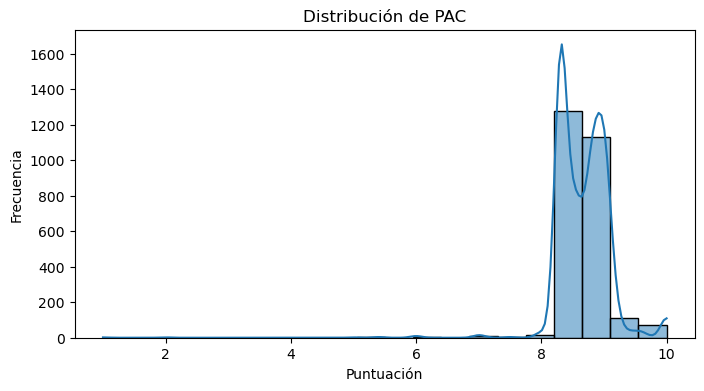

c:\Users\Administrador\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


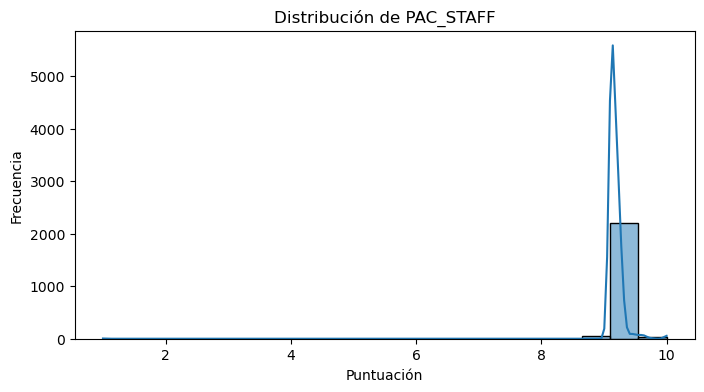

c:\Users\Administrador\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


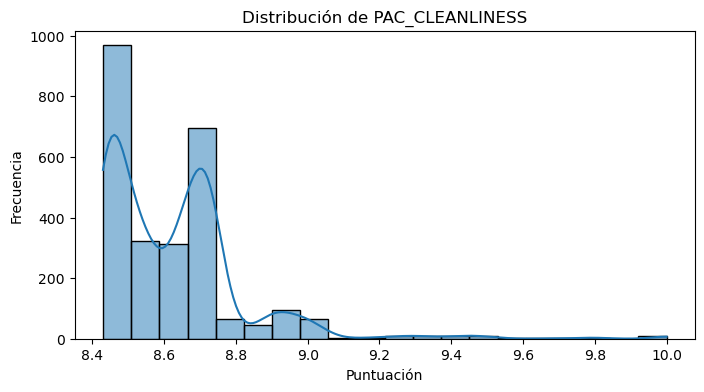

c:\Users\Administrador\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


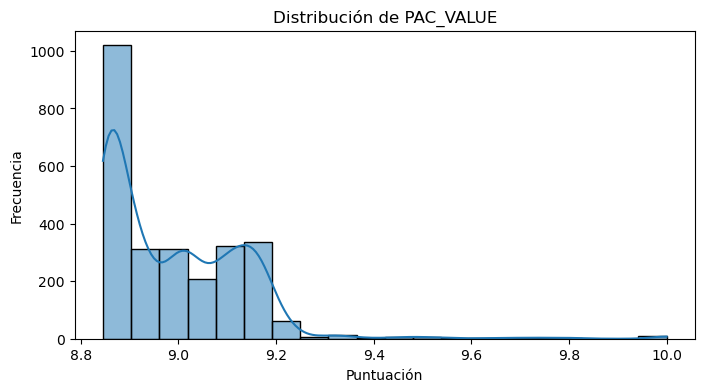

In [11]:
# Histogramas de las puntuaciones
variables = ['PAC', 'PAC_STAFF', 'PAC_CLEANLINESS', 'PAC_VALUE']

for var in variables:
    plt.figure(figsize=(8,4))
    sns.histplot(data[var], bins=20, kde=True)
    plt.title(f'Distribución de {var}')
    plt.xlabel('Puntuación')
    plt.ylabel('Frecuencia')
    plt.show()

* La presencia de valores muy bajos puede indicar problemas específicos en ciertos momentos o con ciertos huéspedes, lo cual podría explorarse más a fondo mediante el análisis de los comentarios.
* Las puntuaciones extremadamente bajas para el personal son atípicas y deben investigarse. Podría tratarse de errores en la entrada de datos o reflejar eventos aislados con el personal.
* Es posible que existan inconsistencias en los estándares de limpieza que podrían abordarse para mejorar la experiencia del huésped.
* Mejorar la percepción de valor podría implicar revisar la relación entre precio y las comodidades ofrecidas, asegurando que los huéspedes sientan que están recibiendo una experiencia acorde al precio pagado.

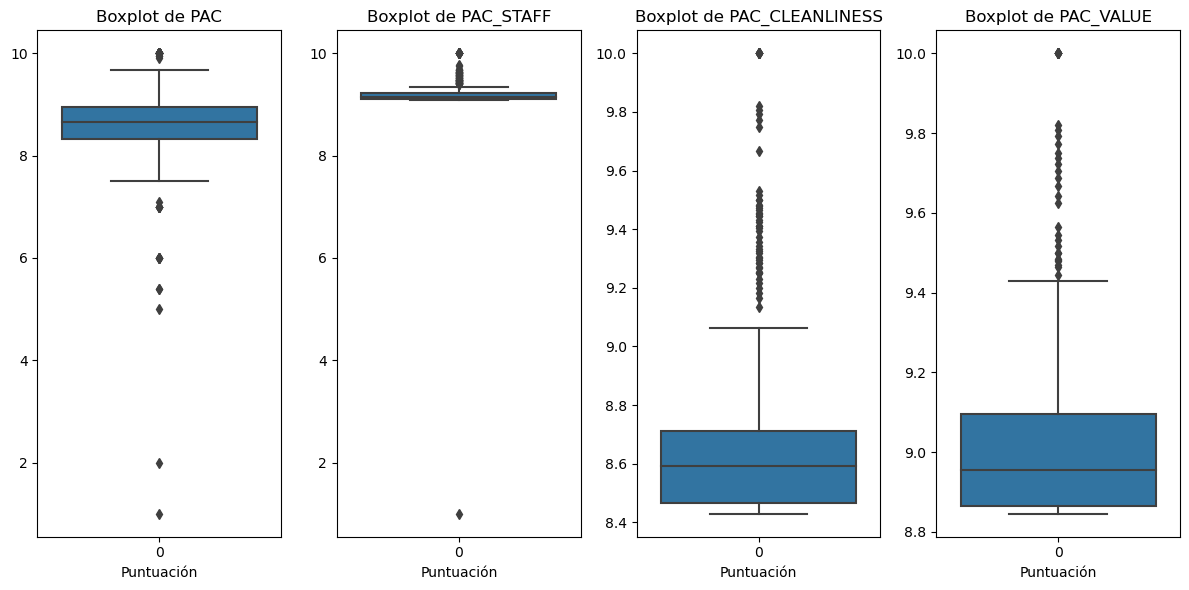

In [12]:
variables_numericas = ['PAC', 'PAC_STAFF', 'PAC_CLEANLINESS', 'PAC_VALUE']

# boxplot
plt.figure(figsize=(12, 6))
for i, var in enumerate(variables_numericas, 1):
    plt.subplot(1, len(variables_numericas), i)
    sns.boxplot(data[var])
    plt.title(f'Boxplot de {var}')
    plt.xlabel('Puntuación')
plt.tight_layout()
plt.show()

# Comentarios

In [13]:
# Detección de idioma
DetectorFactory.seed = 0  # Para resultados consistentes

def detectar_idioma(texto):
    try:
        return detect(texto)
    except:
        return 'unknown'

# Detectar idioma en comentarios positivos
data['idioma_pos'] = data['COMENTARIO_POSITIVO'].apply(lambda x: detectar_idioma(x) if pd.notnull(x) else 'unknown')

In [14]:
# Descargar stopwords para múltiples idiomas
idiomas_unicos = data['idioma_pos'].unique()
for idioma in idiomas_unicos:
    try:
        nltk.download('stopwords')
    except:
        pass

def limpiar_texto(texto, idioma):
    if isinstance(texto, str):
        texto = texto.lower()
        texto = re.sub(r'[^a-záéíóúñü\s]', '', texto, flags=re.UNICODE)
        try:
            stop_words = set(stopwords.words(idioma))
        except:
            stop_words = set()
        palabras = texto.split()
        palabras = [palabra for palabra in palabras if palabra not in stop_words]
        return ' '.join(palabras)
    else:
        return ''

# Limpiar comentarios positivos
data['comentario_pos_limpio'] = data.apply(lambda x: limpiar_texto(x['COMENTARIO_POSITIVO'], x['idioma_pos']), axis=1)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrador\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrador\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrador\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrador\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrador\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrador\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-t

In [15]:
# Cargar el modelo multilingüe de análisis de sentimientos
sentiment_analysis = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

def analizar_sentimiento(texto):
    try:
        resultado = sentiment_analysis(texto[:512])  # Limitar a 512 tokens
        # Convertir la etiqueta en una puntuación numérica
        label = resultado[0]['label']
        score = int(label[0])  # Las etiquetas son '1 star', '2 stars', etc.
        return score
    except:
        return None

# Aplicar análisis de sentimientos a comentarios positivos
data['sentimiento_pos_score'] = data['COMENTARIO_POSITIVO'].apply(lambda x: analizar_sentimiento(x) if pd.notnull(x) else None)

c:\Users\Administrador\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(
c:\Users\Administrador\anaconda3\Lib\site-packages\transformers\modeling_utils.py:479: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization

In [16]:
def clasificar_sentimiento(score):
    if score >= 4:
        return 'Positivo'
    elif score == 3:
        return 'Neutral'
    elif score < 3 and score >= 1:
        return 'Negativo'
    else:
        return 'Desconocido'

# Clasificar el sentimiento de los comentarios positivos
data['sentimiento_pos_clasificado'] = data['sentimiento_pos_score'].apply(clasificar_sentimiento)

# Identificar comentarios negativos 
data['pos_es_negativo'] = data.apply(
    lambda x: True if x['sentimiento_pos_clasificado'] == 'Negativo' and pd.isnull(x['COMENTARIO_NEGATIVO']) else False,
    axis=1
)

df_negativos_en_positivos = data[data['pos_es_negativo']]

In [17]:
data['comentario_mal_catalogado'] = data['pos_es_negativo']

In [18]:
data[data["pos_es_negativo"]==True]

,FECHA,APP,ID_RESERVA,NOMBRE_COMPLETO,PAIS,TIPO_VIAJERO,TIPO_HAB,No_HAB,CALIFICACION,PAC,STAFF,PAC_STAFF,LOCATION,PAC_LOCATION,COMFORT,PAC_COMFORT,CLEANLINESS,PAC_CLEANLINESS,FACILITIES,PAC_FACILITIES,VALUE_MONEY,PAC_VALUE,SECURITY,ATMOSPHERE,PROMEDIO,COMENTARIO_POSITIVO,COMENTARIO_NEGATIVO,BED_RATING,BREAKFAST,ROOM_VIEW,WIFI,idioma_pos,comentario_pos_limpio,sentimiento_pos_score,sentimiento_pos_clasificado,pos_es_negativo,comentario_mal_catalogado
181,NaT,Booking,,ROSALIE,ESTADOS UNIDOS,VIAJA SOLA,CM6,303R,10,9.102198,10,9.299451,10,9.587912,10,8.79558,10,8.942308,10,8.708791,10,9.190110,,,10,NO COMMENT,NaN,NaN,NaN,NaN,NaN,vi,no comment,1.0,Negativo,True,True
182,NaT,Booking,,SARAH - MAUDE,ESTADOS UNIDOS,PAREJA JOVEN,DBP,302,7.9,9.095628,10,9.303279,7.5,9.576503,7.5,8.788462,7.5,8.934426,5,8.688525,10,9.194536,,,7.914286,NO COMMENT,NaN,NaN,NaN,NaN,NaN,vi,no comment,1.0,Negativo,True,True
639,NaT,Booking,,JULIA,BRASIL,VIAJA SOLA,CM8,301N,10,8.940469,10,9.174528,10,9.548666,10,8.694182,10,8.720565,10,8.46305,10,9.081790,,,10,El desayuno era muy sabroso hombrecito regional.,NaN,NaN,NaN,NaN,NaN,es,el desayuno era muy sabroso hombrecito regional,2.0,Negativo,True,True
821,NaT,Booking,,ROGER,FRANCIA,VIAJA SOLA,IEBP,216,6,8.848054,10,9.153423,10,9.529915,7.5,8.627139,7.5,8.699634,7.5,8.427173,7.5,9.036230,,,8,Me alojé aquí por una semana en enero de 2020 ...,NaN,NaN,NaN,10,NaN,es,me alojé aquí por una semana en enero de el de...,2.0,Negativo,True,True
865,NaT,Booking,,KAREN,COLOMBIA,VIAJA SOLA,IEBP,216,6,8.850000,7.5,9.163763,10,9.550464,5,8.643438,7.5,8.707898,7.5,8.44186,7.5,9.037907,,,NaN,El día que me aloje hizo mucho ruido,NaN,NaN,NaN,NaN,NaN,es,el día que me aloje hizo mucho ruido,1.0,Negativo,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2503,NaT,Booking,,Andrea Meneces,BRASIL,VIAJA ACOMPAÑADA,314,DBC,9,8.309269,10,9.112282,10,9.453765,7.5,8.376013,10,8.443337,7.5,8.242805,10,8.856220,,,9.142857,Desayuno muy pequeño. Aunque el jefe es muy ca...,NaN,NaN,NaN,NaN,NaN,es,desayuno muy pequeño aunque el jefe es muy cap...,2.0,Negativo,True,True
2519,NaT,Booking,,Dominga Lacobazzi,PAISES BAJOS,VIAJA SOLA,215,IEBC,7,8.310530,7.5,9.109948,7.5,9.453263,7.5,8.372383,5,8.439276,7.5,8.237012,7.5,8.853523,,,7.071429,El baño común no estaba tan limpio como se esp...,NaN,NaN,NaN,NaN,NaN,es,el baño común no estaba tan limpio como se esp...,2.0,Negativo,True,True
2525,NaT,Booking,,Kim Teaky,COREA DEL SUR,VIAJA SOLA,207,IEBC,7,8.306116,10,9.110084,10,9.454565,7.5,8.370281,5,8.437013,5,8.235235,5,8.851265,,,7.071429,"Había una discoteca frente a mi dormitorio, as...",NaN,NaN,NaN,NaN,NaN,es,había una discoteca frente a mi dormitorio así...,2.0,Negativo,True,True
2533,NaT,Booking,,Tayse Palitot,BRASIL,VIAJA SOLA,203W,CF4,7,8.301702,10,9.110933,10,9.455303,7.5,8.368495,5,8.434014,5,8.232879,10,8.851942,,,7.785714,"El baño del baño de mujeres no funcionaba, sie...",NaN,NaN,NaN,NaN,NaN,es,el baño del baño de mujeres no funcionaba siem...,2.0,Negativo,True,True


In [37]:
data.to_excel("data.xlsx")

# Dash

### Pruebas

In [19]:
#comentarios mal catalogados
total_comentarios = len(data)
total_mal_catalogados = data['comentario_mal_catalogado'].sum()
porcentaje_mal_catalogados = (total_mal_catalogados / total_comentarios) * 100

#  gráfico de pastel
fig_mal_catalogados = px.pie(
    names=['Correctos', 'Mal Catalogados'],
    values=[total_comentarios - total_mal_catalogados, total_mal_catalogados],
    title='Porcentaje de Comentarios Mal Catalogados en la Columna Positiva',
    template='plotly_white'  # Aplicar tema claro
)

# Colores
fig_mal_catalogados.update_traces(
    textfont_color='black',
    marker=dict(colors=['#1f77b4', '#ff7f0e'])  # Colores contrastantes para tema claro
)

# tabla con ejemplos de comentarios mal catalogados
tabla_mal_catalogados = df_negativos_en_positivos[['COMENTARIO_POSITIVO']].head(10)

# Inicializar 
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1('Análisis de Comentarios de Clientes', style={'color': '#333'}),

    html.H2('Comentarios Mal Catalogados en la Columna Positiva', style={'color': '#555'}),
    dcc.Graph(figure=fig_mal_catalogados),

    html.H3(f'Total de comentarios mal catalogados: {total_mal_catalogados} ({porcentaje_mal_catalogados:.2f}%)',
            style={'color': '#555'}),

    html.H2('Ejemplos de Comentarios Mal Catalogados', style={'color': '#555'}),
    html.Table([
        html.Tr([html.Th('Comentario Mal Catalogado', style={'border': '1px solid #ddd', 'padding': '8px'})])
    ] + [
        html.Tr([html.Td(comentario, style={'border': '1px solid #ddd', 'padding': '8px'})])
        for comentario in tabla_mal_catalogados['COMENTARIO_POSITIVO']
    ], style={'border-collapse': 'collapse', 'width': '100%'}),
], style={'backgroundColor': '#f9f9f9', 'color': '#333', 'padding': '20px'})  # Estilos para tema claro

if __name__ == '__main__':
    app.run_server(debug=True)

### Comentarios